# DT

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

# iris data
iris_dataset = load_iris()

iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
# data split(random_state는 셔플을 위한 랜덤 시드)
X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2020)

# sklearn의 DTC는 pruning은 지원하지 않고, post-pruningj만 지원합니다
# max_depth, max_leaf_nodes 또는 min_samples_leaf로 post-pruning을 조절하는데 보통 이 중 하나로 조절합니다
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 2020)

# modeling
clf.fit(X_train,y_train)

print('train set score {:3f}'.format(clf.score(X_train,y_train)))
print('test set score {:3f}'.format(clf.score(X_test,y_test)))


# depth가 커지면 새로운 데이터를 적용하기 곤란하고 예측오차의 수치가 높아짐
# 이 경우 pruning(가지치기)을 통해 
# min_samples_split : 분할되기 위해 노드가 가져야하는 최소샘플 수 
# min_samples_leaf: 리프 노드가 가지고있어야 하는 최소 샘플 수 
# max_leaf_nodes: 리프 노드의 최대수 
# max_features: 각 노드에서 분할에 사용할 특성의 최대 수 

train set score 0.991667
test set score 0.900000


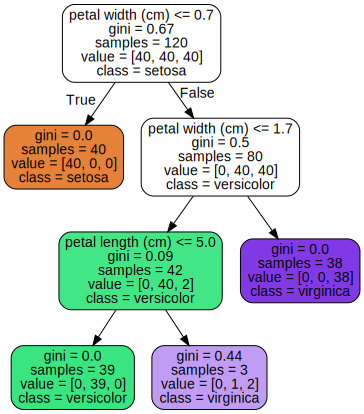

In [14]:
from sklearn.tree import export_graphviz
import graphviz
import os

os.environ['PATH']+=os.pathsep+'C:/Anaconda3/Library/bin/graphviz/'


# model save
# filled는 색깔, precision은 소수점 자리수 등
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
export_graphviz(clf, out_file = 'iris.dot',
               feature_names = iris_dataset.feature_names,
               class_names = iris_dataset.target_names,
               rounded=True, proportion = False,
               filled=True, precision = 2)

# open
with open('iris.dot') as f:
    dot_graph = f.read()

dot_graph

graphviz.Source(dot_graph)


# 여기서 gini 속성은 불순도를 측정함. 한 노드의 모든 샘플이 같은 클래스에 속하면 gini = 0
# graphviz는 직관적인 색으로 그룹까지 분류해줌
# 여기서의 분류 규칙은 petal width 였는데 이것이 즉 부모 노드와 자식 노드간 엔트로피를 가장 낮게 하는 독립변수이자 기준값(정보획득)

In [37]:
from sklearn.metrics import accuracy_score

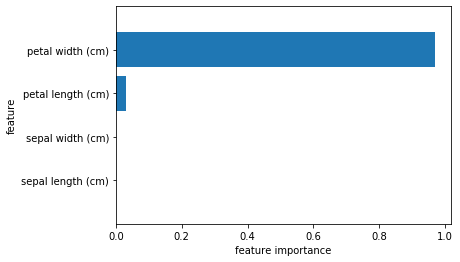

In [33]:
# 어떤 featrue가 주로 사용되었는지 확인해봅시다, 위의 그림 속 맨 위줄 부등호만 봐도 알 수 있긴 하지만.
# 아래의 결과를 보고 'width가 높으면 어떤 클래스이겠구나' 혹은 그 반대를 단정지을 수 없음.

from matplotlib import pyplot as plt
import numpy as np

def plot_feature_importances_iris_dataset(model):
    n_features = iris_dataset.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris_dataset.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_iris_dataset(clf)

# KNN

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg 
# matplotlib nbagg는 매직명령어
 
A_x_list = [0,2,4,1,1,4]
A_y_list = [4,1,5,5,2,6]
A_x = np.array(A_x_list)
A_y = np.array(A_y_list)
 
B_x_list = [7,7,5,7,10,9]
B_y_list = [4,0,2,2,3,3]
B_x = np.array(B_x_list)
B_y = np.array(B_y_list)
 
finding_point = [5,4]

print(A_x_list)
print(A_x)

[0, 2, 4, 1, 1, 4]
[0 2 4 1 1 4]


<IPython.core.display.Javascript object>


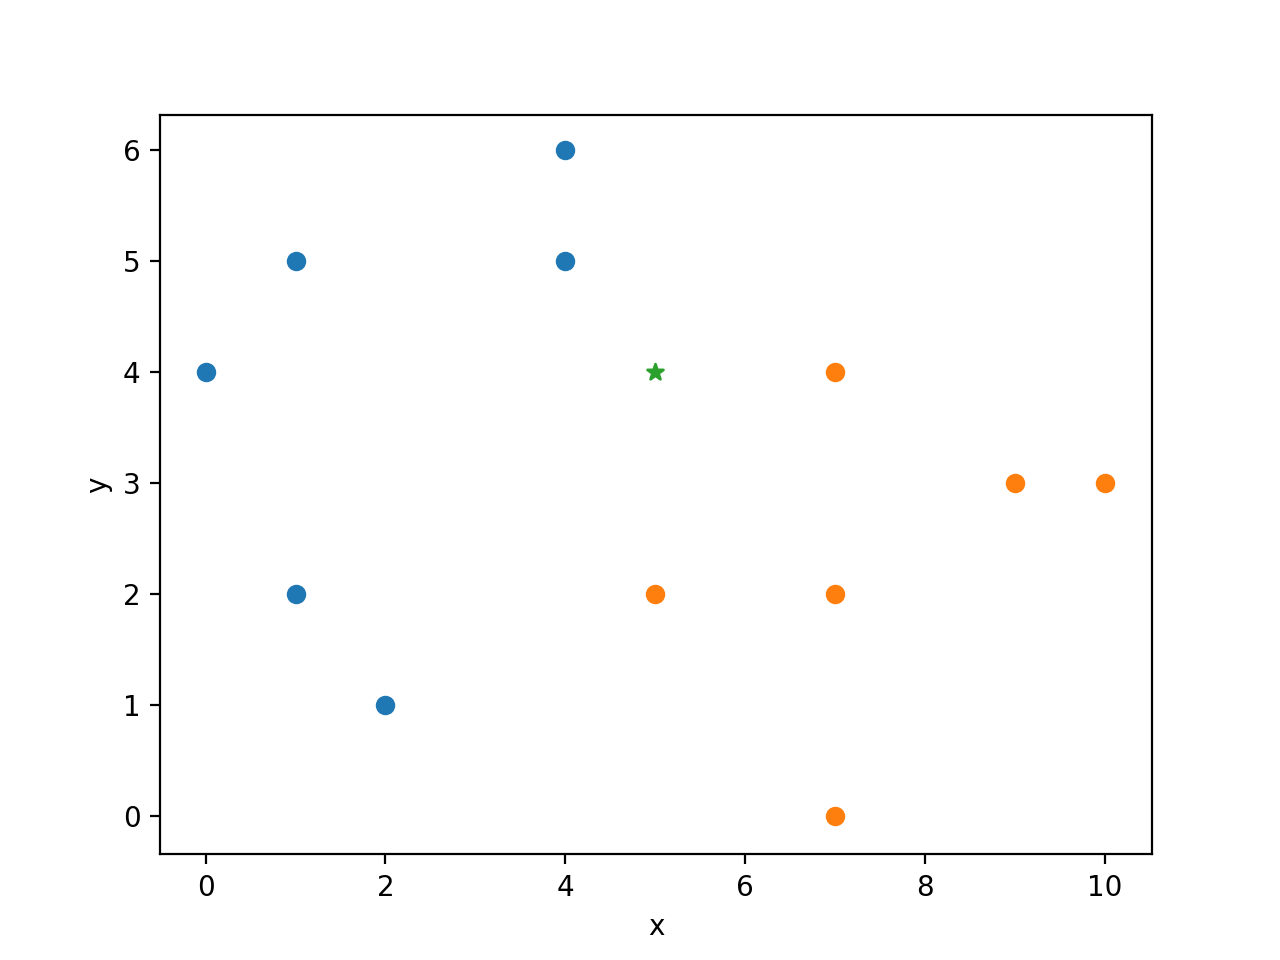

In [42]:
plt.figure()
#plt.axis(option = 'on')
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(A_x,A_y)
plt.scatter(B_x,B_y)
plt.scatter(finding_point[0],finding_point[1], marker='*')
 
plt.show()

In [43]:
def count_min_value(L,c):
    temp = L.copy()
    temp.sort()
    item = temp[c-1]
    return L.index(item),item


In [44]:
# 입력값이 A그룹인지 B그룹인지 찾는 함수::KNN Algorithm 적용
def finding_AorB(k,x,y):
    # numA, numB는 합이 k이고, target에서 가까운 점들 중 A , B의 점이 각각 몇 개인지 나타낼 것
    numA = 0
    numB = 0
    
    # x, y 좌표를 합쳐서 A_xy, B_xy에 넣어줌
    A_xy = []
    B_xy = []
    
    # x,y 좌표가 따로 있는 것을 하나의 리스트로 통합
    for i in range(len(A_x_list)):
        A_xy.append([A_x_list[i],A_y_list[i]])
    for i in range(len(B_x_list)):
        B_xy.append([B_x_list[i],B_y_list[i]])
 
    A_distance = []
    B_distance = []
    
    # x,y 좌표에 대해 입력값과의 거리 산출
    for each in A_xy:
        dis = ((each[0] - x)**2 + (each[1] - y)**2)**(1/2)
        A_distance.append(dis)
    for each in B_xy:
        dis = ((each[0] - x)**2 + (each[1] - y)**2)**(1/2)
        B_distance.append(dis)
        
    A_result = []
    B_result = []
    
    # 첫번째로 가까운 값부터 시작
    A_min_count = 1
    B_min_count = 1
    
    # numA, numB는 합이 k이고, target에서 가까운 점들 중 A , B의 점이 각각 몇 개인지 나타냄
    while(numA + numB < k):
        min_A = 99999
        min_B = 99999

        # target과 min_count번째로 가까운 A 집합의 점, 가장 가까운 B 집합의 점을 각각 구함
        _, min_A = count_min_value(A_distance,A_min_count)
        _, min_B = count_min_value(B_distance,B_min_count)

        
        # A,B 집합에서 각각 구한 점을 비교해서 거리가 짧은 점의 집합에 num, min_count 모두 1씩 키워줌
        if min_A < min_B:
            numA += 1
            A_min_count += 1
            A_result.append(A_xy[A_distance.index(min_A)])
            A_distance[A_distance.index(min_A)] = -1
            
        elif min_A > min_B:
            numB += 1
            B_min_count += 1
            B_result.append(B_xy[B_distance.index(min_B)])
            B_distance[B_distance.index(min_B)] = -1
        
        # 같은 거리에 있는 점이 있는 경우 A, B 모두 증가시켜줌
        elif min_A == min_B:
            numA += 1
            numB += 1
            A_min_count += 1
            B_min_count += 1
            A_result.append(A_xy[A_distance.index(min_A)])
            A_distance[A_distance.index(min_A)] = -1
            B_result.append(B_xy[B_distance.index(min_B)])
            B_distance[B_distance.index(min_B)] = -1
            
    if numA > numB:
        print("RESULT: The point is A")
    elif numA < numB:
        print("RESULT, The point is B")
    elif numA == numB:
        print("I DON'T KNOW")
    print("near A point is",A_result,"\nnear B point is",B_result,"\n")

In [84]:
# k 값을 바꿔가면서 실행해보세요
k = 4
finding_AorB(k,finding_point[0],finding_point[1])

I DON'T KNOW
near A point is [[4, 5], [4, 6]] 
near B point is [[7, 4], [5, 2]] 



In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2020)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier (n_neighbors =1)

In [89]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [103]:
X_new = np.array([[5, 6, 2, 3]])

In [104]:
prediction = knn.predict(X_new)

In [108]:
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [116]:
knn2 = KNeighborsClassifier (n_neighbors =10)

In [117]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [118]:
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


## 새로운 데이터 사용해서 분석해보기 

In [16]:
from sklearn.datasets import load_breast_cancer

In [18]:
cancer=load_breast_cancer()

In [19]:
X= cancer.data
y= cancer.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2020)

In [21]:
dtree = DecisionTreeClassifier(random_state= 0)

In [22]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [24]:
print('train set score {:3f}'.format(dtree.score(X_train,y_train)))
print('test set score {:3f}'.format(dtree.score(X_test,y_test)))

train set score 1.000000
test set score 0.947368


In [25]:
dtreeLimit = DecisionTreeClassifier(max_depth = 3, random_state= 0)

In [26]:
dtreeLimit.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [27]:
print('train set score {:3f}'.format(dtreeLimit.score(X_train,y_train)))
print('test set score {:3f}'.format(dtreeLimit.score(X_test,y_test)))

train set score 0.973626
test set score 0.929825


In [31]:
export_graphviz(dtreeLimit, out_file = 'decisionTreeLimit.dot',
               feature_names = cancer.feature_names,
               class_names = cancer.target_names,
               rounded=True, proportion = False,
               filled=True, precision = 2)

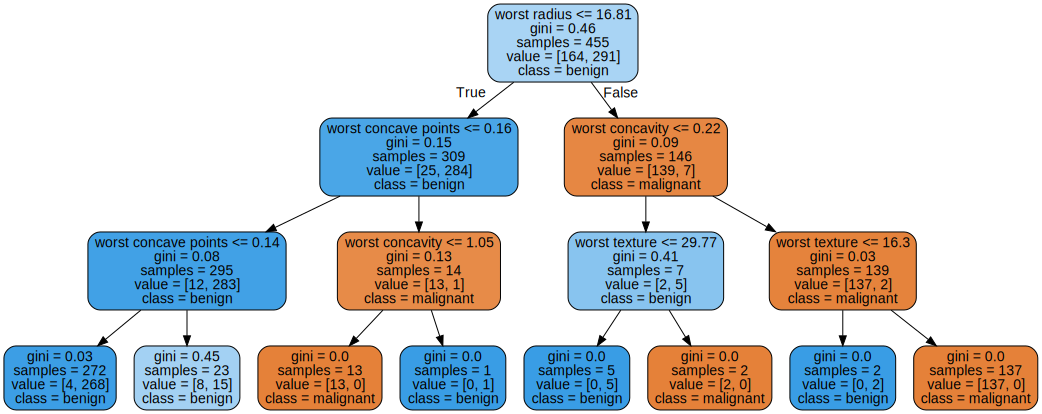

In [32]:
with open('decisionTreeLimit.dot') as f:
    dtdot_graph = f.read()

dtdot_graph

graphviz.Source(dtdot_graph)

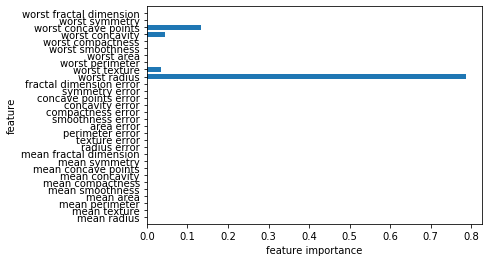

In [36]:
def plot_feature_importances_cancer_dataset(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer_dataset(dtreeLimit)

#worst radius의 importance가 제일 큼

# Random Forrest

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
df = pd.read_csv("AB_NYC_2019.csv")

In [5]:
# 브루클린, 맨하튼 숙소만 해볼거니까 이거만 추림
our_set = df[df['neighbourhood_group'].isin(['Brooklyn', 'Manhattan'])]
df.shape, our_set.shape,

((48895, 16), (41765, 16))

In [6]:
set(our_set['room_type'])

{'Entire home/apt', 'Private room', 'Shared room'}

In [7]:
onehot = pd.get_dummies(our_set['room_type'])
onehot

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
48890,0,1,0
48891,0,1,0
48892,1,0,0
48893,0,0,1


In [8]:
# 핵심 컬럼만 뽑음 + 더미변수까지 결합
core_cols = our_set[['neighbourhood_group', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']]
combined = core_cols.merge(onehot, left_index=True, right_index=True, how='left').reset_index()
combined.head()

,index,neighbourhood_group,price,minimum_nights,number_of_reviews,reviews_per_month,Entire home/apt,Private room,Shared room
0,0,Brooklyn,149,1,9,0.21,0,1,0
1,1,Manhattan,225,1,45,0.38,1,0,0
2,2,Manhattan,150,3,0,NaN,0,1,0
3,3,Brooklyn,89,1,270,4.64,1,0,0
4,4,Manhattan,80,10,9,0.10,1,0,0


In [9]:
final = combined.drop(columns=['index']).dropna() # 인덱스가 중복되어있으므로 버리고, 편의상 na도 다 버림
final.shape

(33079, 8)

In [10]:
final = final.replace('Brooklyn', 0).replace('Manhattan', 1)  # brooklyn은 0, manhattan은 1로 바

In [11]:
bk = len(final[final['neighbourhood_group']==0])
mh = len(final[final['neighbourhood_group']==1])
tt = len(final)
print(bk, mh, tt) # 브루클린 건은 16447, 맨하탄 건은 16632건, 총 33079건

16447 16632 33079


In [12]:
import random

random_seed = random.randint(0,1000)
random_seed

920

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']], final['neighbourhood_group'], 
                                                    test_size=0.25, random_state=random_seed)

##  DT

In [45]:
dtroom = DecisionTreeClassifier(random_state= random_seed)

In [51]:
from sklearn.metrics import accuracy_score
import time

In [52]:
t0 = time.time()
dtroom.fit(X_train, y_train)
elapsed = time.time()-t0
print("걸린시간은 {:.2f}초입니다.".format(elapsed))

걸린시간은 0.01초입니다.


In [53]:
prediction0 = dtroom.predict(X_test)
### 채점
accuracy = accuracy_score(y_test, prediction0)#맞는지 아닌지 비교해보겠다는거에요
### 성적 발표
print(f'Mean accuracy score: {100*accuracy:.3}%')

Mean accuracy score: 94.7%


In [55]:
dtroom1 = DecisionTreeClassifier(max_depth = 5, random_state= random_seed)

In [58]:
t1 = time.time()
dtroom1.fit(X_train, y_train)
elapsed = time.time()-t1
print("걸린시간은 {:.2f}초입니다.".format(elapsed))

걸린시간은 0.01초입니다.


In [59]:
prediction1 = dtroom1.predict(X_test)
### 채점
accuracy = accuracy_score(y_test, prediction1)#맞는지 아닌지 비교해보겠다는거에요
### 성적 발표
print(f'Mean accuracy score: {100*accuracy:.3}%')

Mean accuracy score: 95.6%


## SVM

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']], final['neighbourhood_group'], 
                                                    test_size=0.25, random_state=random_seed)

In [71]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
import time

### 학습 진행
clf1= SVC(kernel='rbf', C=10.0, random_state=random_seed, gamma=0.10)

t0 = time.time()
clf1.fit(X_train, y_train)
elapsed = time.time()-t0
print("걸린시간은 {:.2f}초입니다.".format(elapsed))

걸린시간은 67.60초입니다.


In [72]:
prediction1 = clf1.predict(X_test)
### 채점
accuracy = accuracy_score(y_test, prediction1)#맞는지 아닌지 비교해보겠다는거에요
### 성적 발표
print(f'Mean accuracy score: {100*accuracy:.3}%')

Mean accuracy score: 58.5%


In [73]:
clf2= SVC(kernel='rbf', C=100.0, random_state=random_seed, gamma=10)


t1 = time.time()
clf2.fit(X_train, y_train)
elapsed = time.time()-t1
print("걸린시간은 {:.2f}초입니다.".format(elapsed))

걸린시간은 32.44초입니다.


In [74]:
prediction2 = clf2.predict(X_test)
### 채점
accuracy = accuracy_score(y_test, prediction2)#맞는지 아닌지 비교해보겠다는거에요
### 성적 발표
print(f'Mean accuracy score: {100*accuracy:.3}%')

Mean accuracy score: 53.2%


In [81]:
clf3= SVC(kernel='rbf', C=1.0, random_state=random_seed, gamma=0.0010)


t2 = time.time()
clf3.fit(X_train, y_train)
elapsed = time.time()-t2
print("걸린시간은 {:.2f}초입니다.".format(elapsed))

걸린시간은 20.87초입니다.


In [82]:
prediction3 = clf3.predict(X_test)
### 채점
accuracy = accuracy_score(y_test, prediction3)#맞는지 아닌지 비교해보겠다는거에요
### 성적 발표
print(f'Mean accuracy score: {100*accuracy:.3}%')

Mean accuracy score: 63.1%


## XGBoost

In [ ]:
#gbm보다 빠르다
#분류와 회귀 둘다 가능
#기반은 gradient boost
#다른 점은 과적합을 방지하기 위한 규제가 있다는 점

In [119]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [120]:
#저 이거 열심히 설치해보려고 ㅠㅠㅠ 인터넷에도 찾아봤는데 
#conda install, pip install conda 가상환경에서 설치 
# 다안돼서ㅠㅠㅠㅠㅠㅠㅠㅠㅠ휴ㅠ